In [ ]:
!pip install pandas matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = pd.read_csv('dataset.csv')


# **Exploratory Data Analysis**

### Class balance analysis

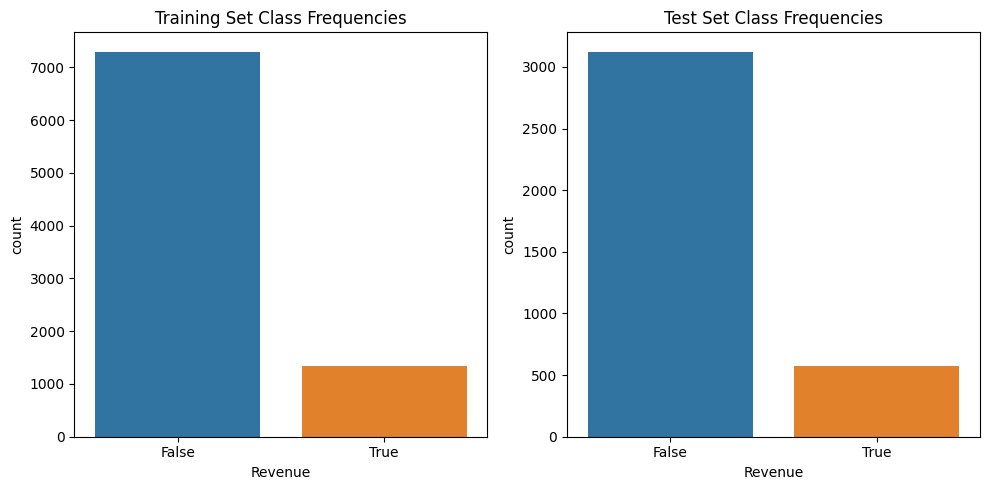

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into training and test sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42) # 70% training and 30% test

# Frequency of occurrence of each class in the training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Revenue', data=train_data)
plt.title('Training Set Class Frequencies')

# Frequency of occurrence of each class in the test set
plt.subplot(1, 2, 2)
sns.countplot(x='Revenue', data=test_data)
plt.title('Test Set Class Frequencies')

plt.tight_layout()
plt.show()


## Class Distribution in Training and Test Sets

The bar charts above represent the distribution of classes within the training and test sets of our dataset. These distributions are critical to understanding the balance of our data regarding the binary 'Revenue' outcome we are predicting.

### Training Set Class Frequencies
The left chart shows the frequency of the 'False' and 'True' classes in the training set. It is evident that the dataset is imbalanced, with the 'False' class significantly outweighing the 'True' class. Specifically, the 'False' class appears more than 7000 times, while the 'True' class frequency is just over 1000 instances.

### Test Set Class Frequencies
The right chart presents a similar class frequency distribution for the test set. Here again, we see an imbalance, with the 'False' class being more prevalent than the 'True' class. The 'False' class frequency is around 3,000 counts, and the 'True' class is near 500 counts.


### Attributes View

An analysis of the distribution of values ​​for each attribute

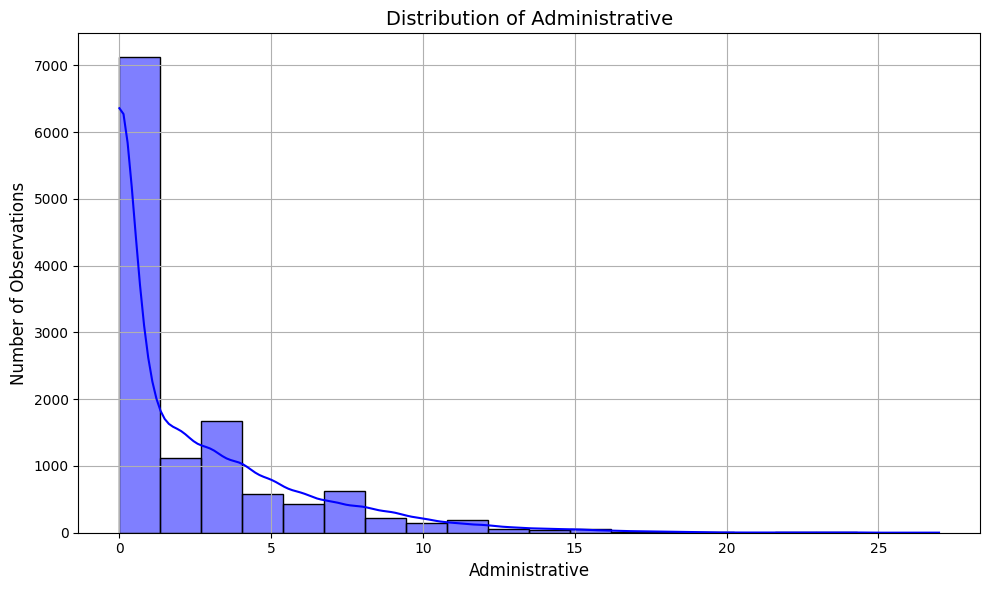

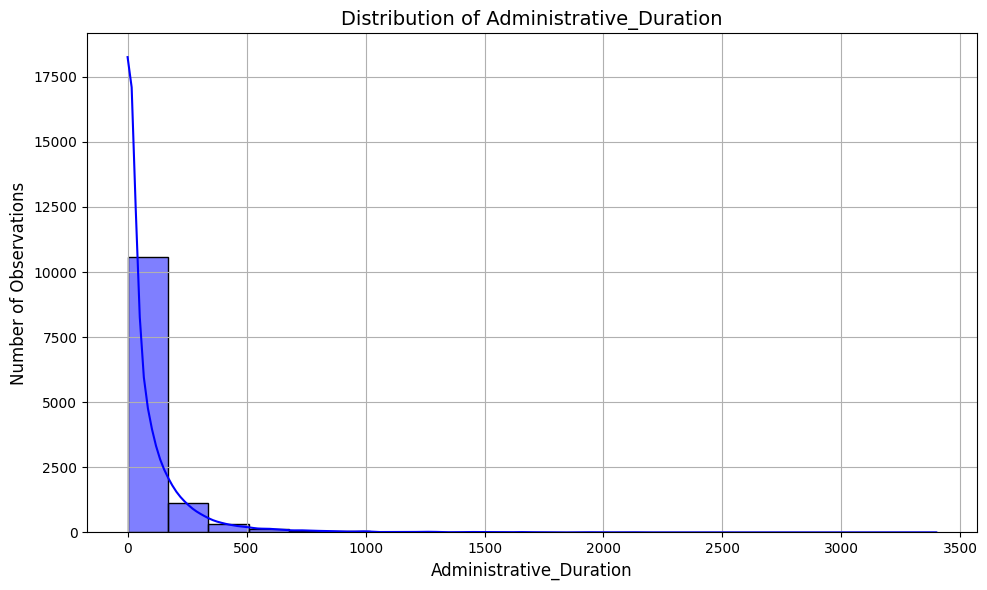

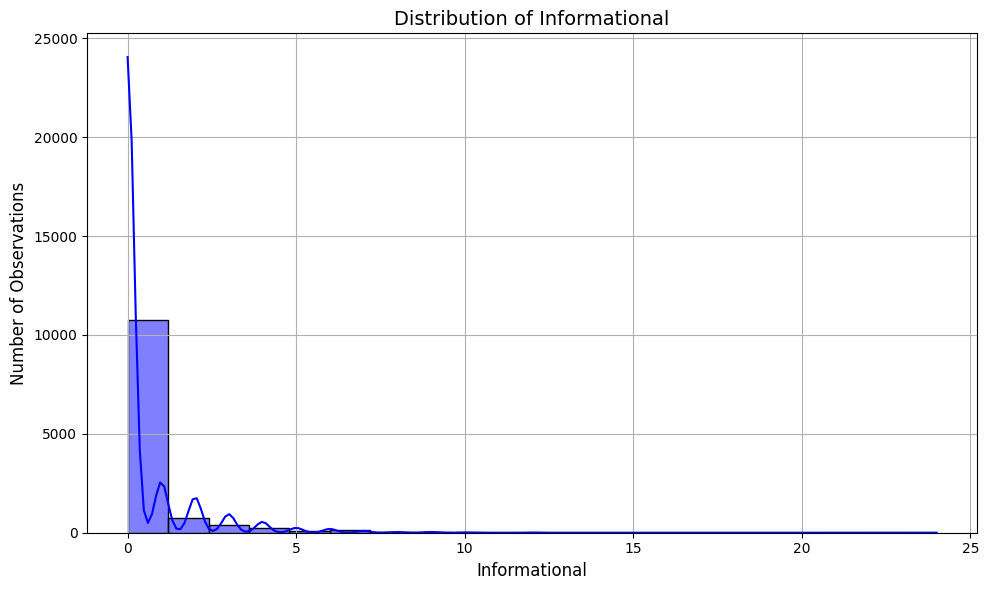

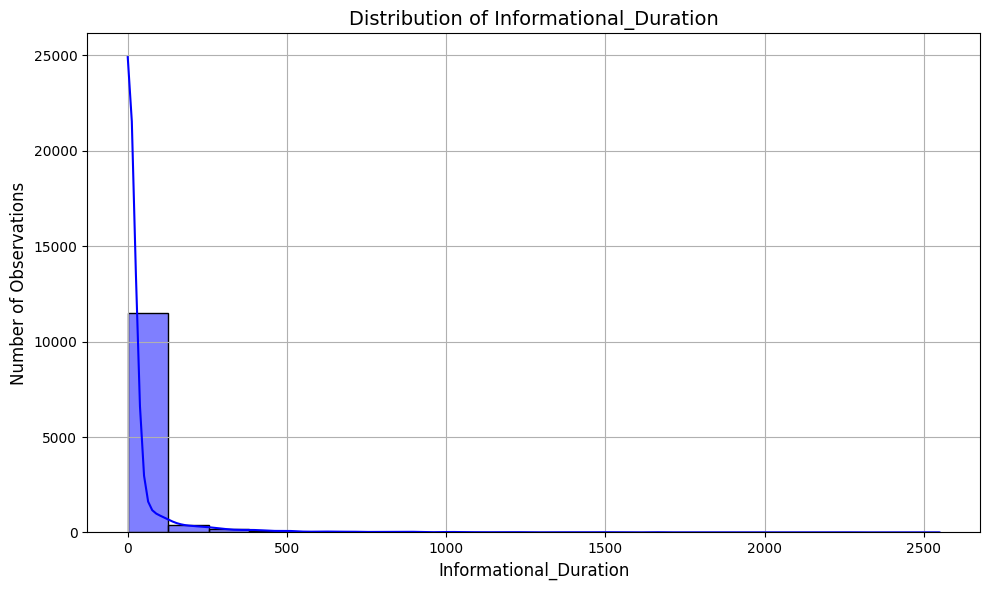

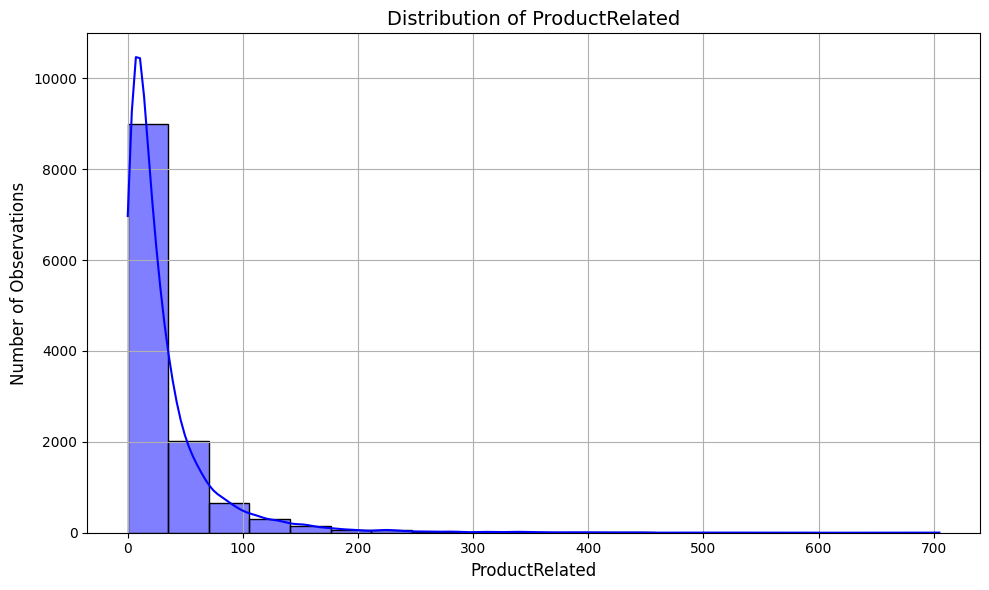

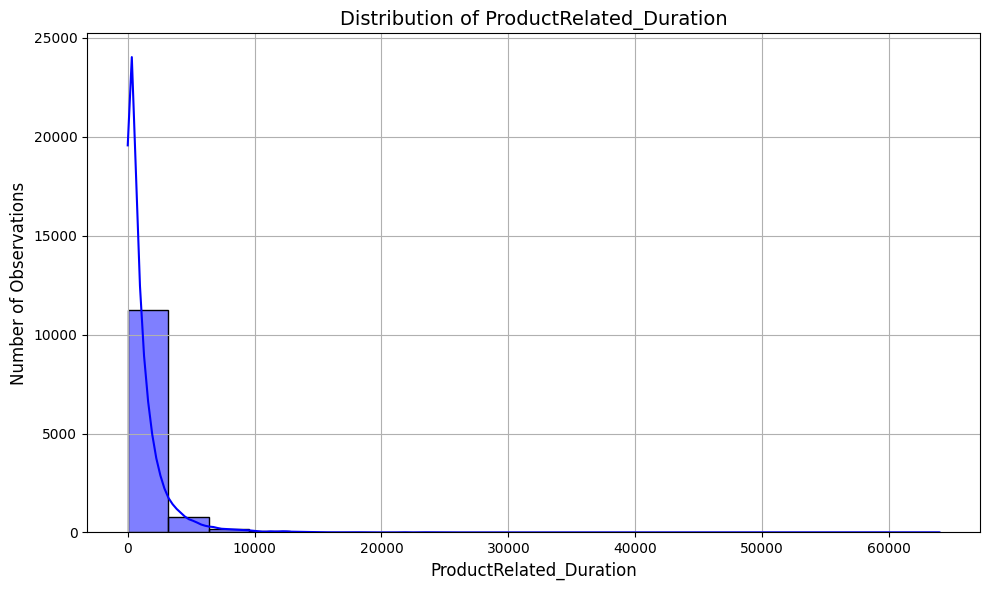

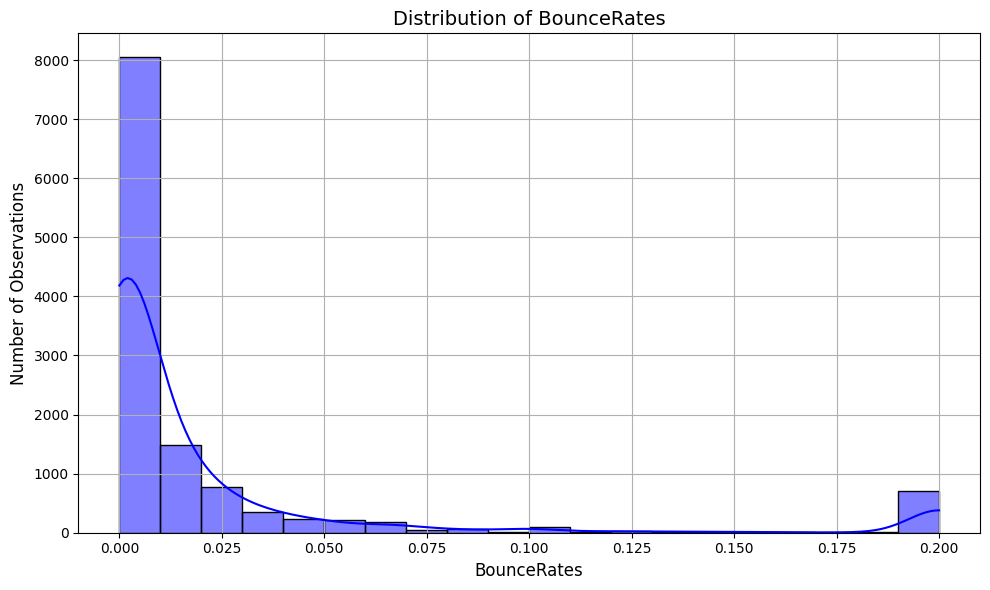

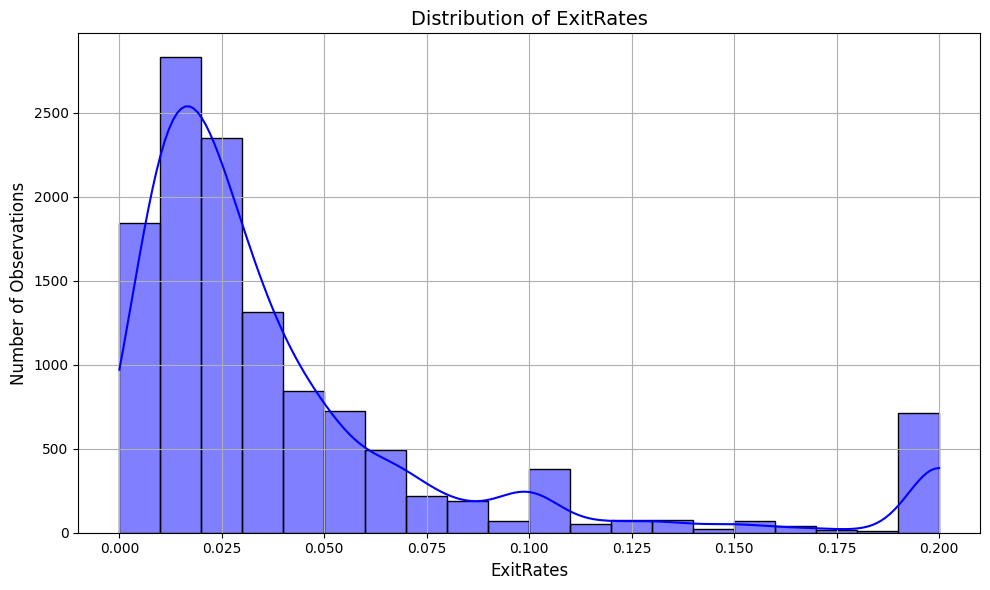

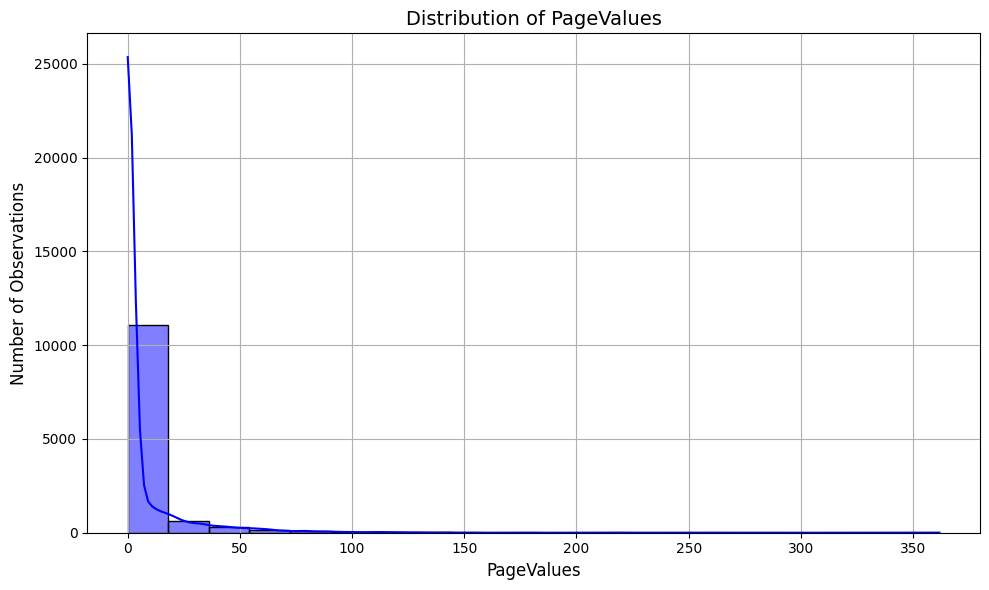

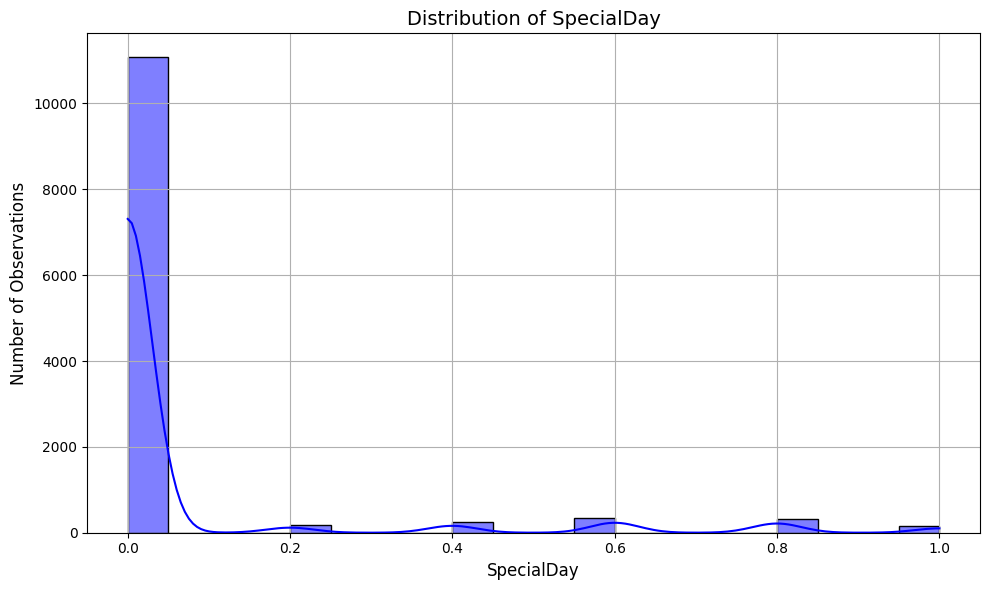

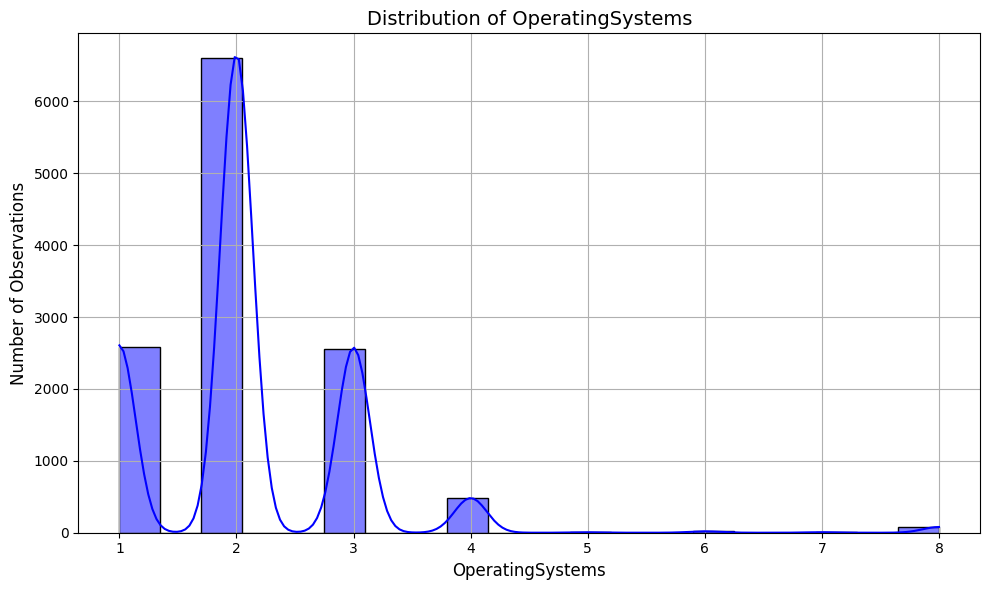

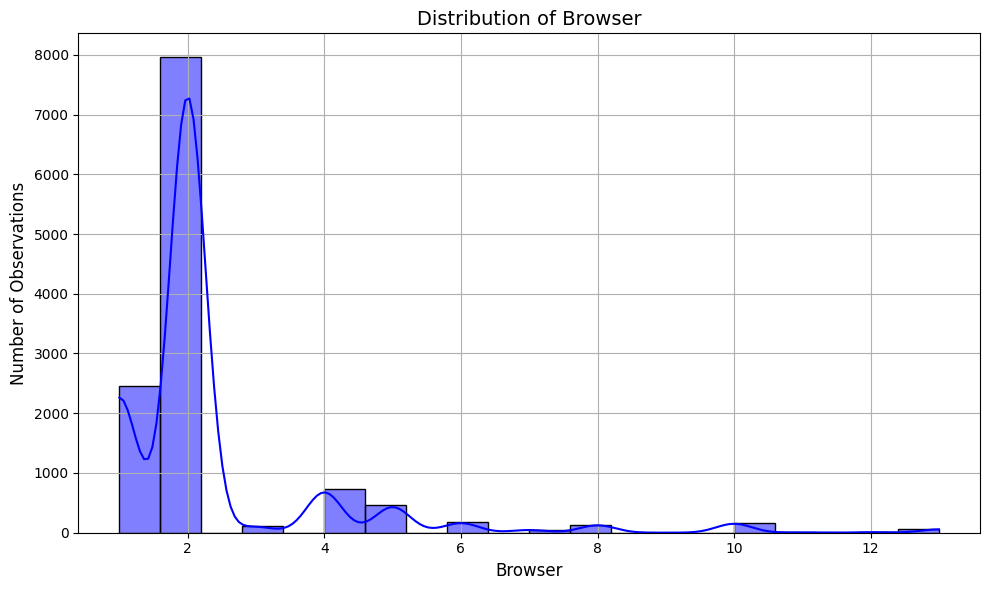

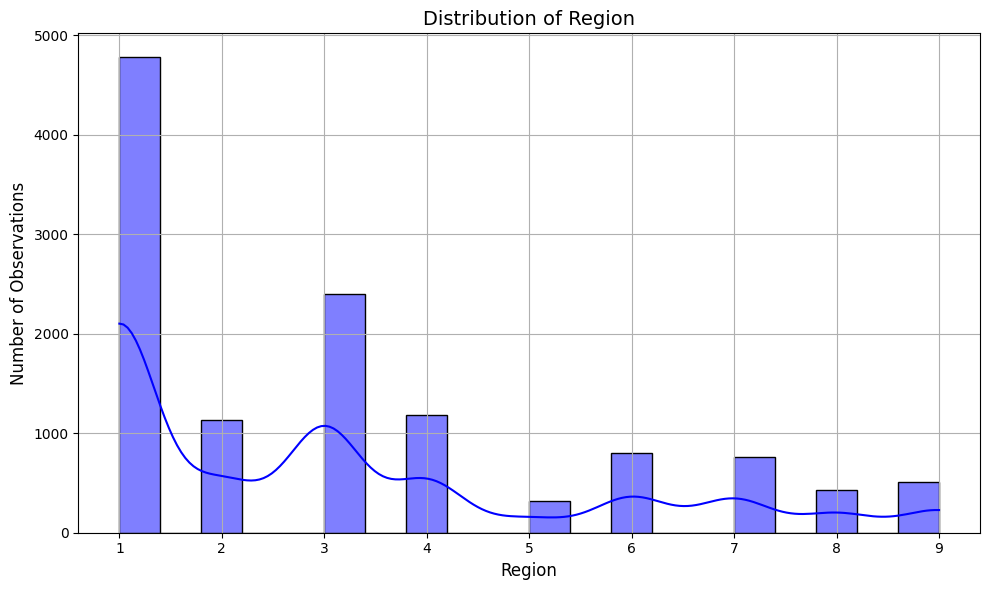

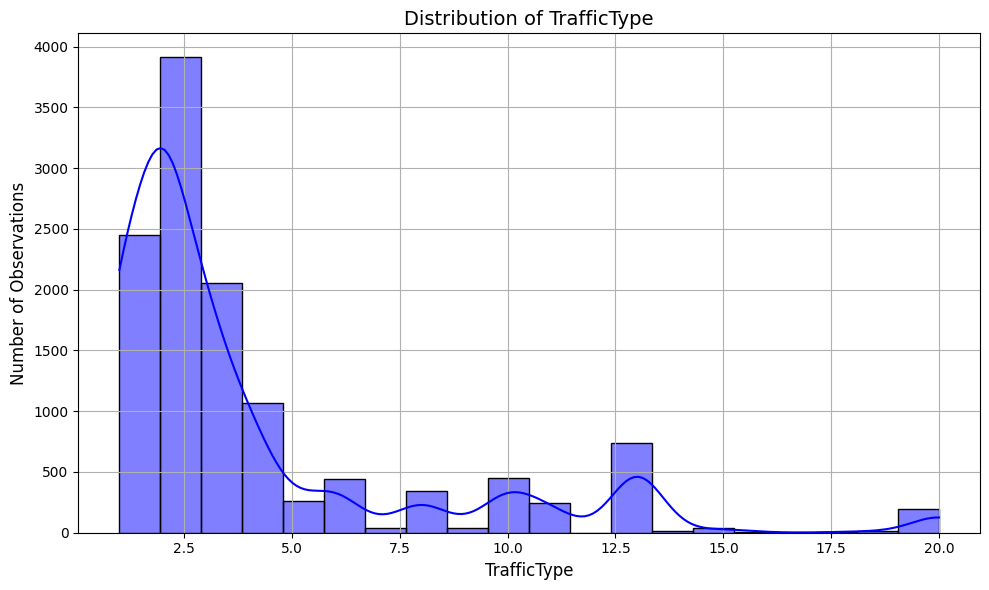

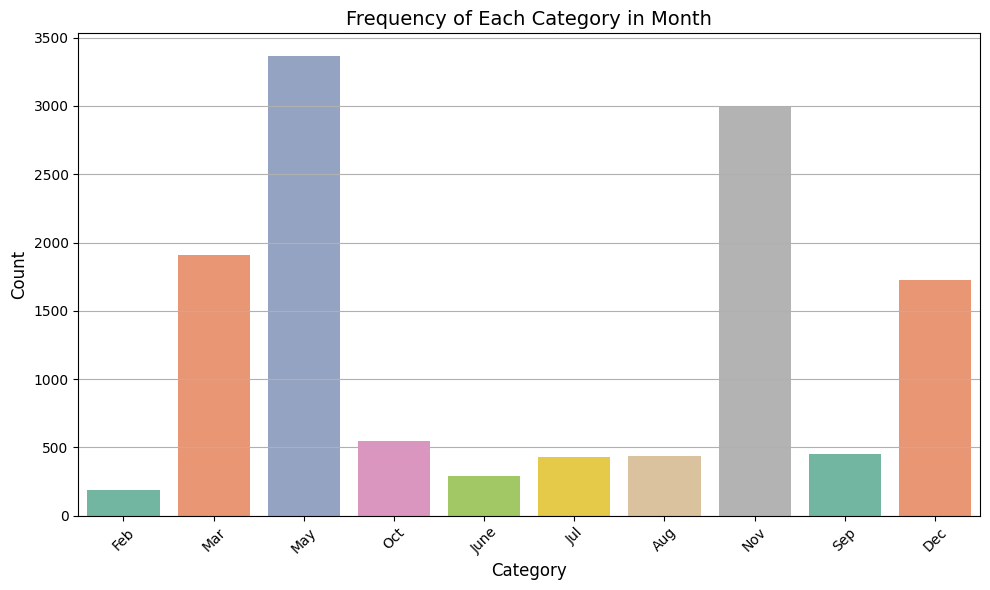

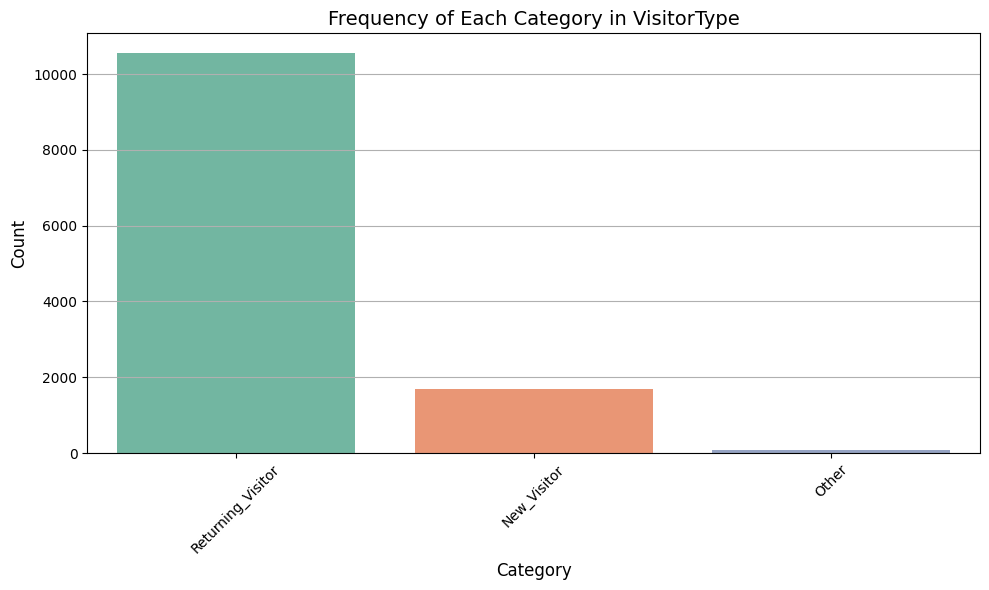

In [ ]:
import numpy as np

# Identify numeric and categorical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Numeric attributes
for col in numeric_columns:
    # Create a new figure for each numeric column
    plt.figure(figsize=(10, 6))

    # Plot a histogram with 20 bins and kernel density estimation
    sns.histplot(data[col], bins=20, kde=True, color='blue')

    # Set the title, x-axis label, and y-axis label for the plot
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Number of Observations', fontsize=12)

    # Add grid lines to the plot and ensure a tight layout
    plt.grid(True)
    plt.tight_layout()

    plt.show()

# Categorical attributes
for col in categorical_columns:
    # Create a new figure for each categorical column
    plt.figure(figsize=(10, 6))

    # Plot a count plot for the categorical column with color palette 'Set2'
    sns.countplot(x=col, data=data, palette='Set2')

    # Set the title, x-axis label, and y-axis label for the plot
    plt.title(f'Frequency of Each Category in {col}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add grid lines to the plot along the y-axis and ensure a tight layout
    plt.grid(axis='y')
    plt.tight_layout()

    plt.show()


## Numeric Feature Distributions

Descriptions of the histograms representing the distribution of numeric features within the dataset:

- **Administrative**: Most sessions involve few administrative pages, as indicated by the skew towards lower values in this histogram.
- **Administrative Duration**: The time spent on administrative pages is generally brief across sessions, with a distribution skewed towards lower durations.
- **Informational**: A concentration of values at the lower end suggests that informational pages are rarely visited during most sessions.
- **Informational Duration**: Reflects the generally short duration spent on informational pages, with a skew towards lower values.
- **ProductRelated**: Although skewed towards the lower end, the long tail of the distribution indicates that some sessions include visits to many product-related pages.
- **ProductRelated Duration**: Shows a wide range of durations spent on product-related pages, with most being short visits.
- **BounceRates**: The distribution is highly left-skewed, indicating that most pages have a very low bounce rate.
- **ExitRates**: This feature also exhibits left-skewness, with most sessions having low exit rates.
- **PageValues**: The peak at zero suggests that most pages do not contribute directly to e-commerce revenue.
- **SpecialDay**: The majority of visits do not occur close to special days, as indicated by the concentration of values at zero.
- **OperatingSystems**: Depicts the distribution of operating systems used, with a focus on the lower numbered categories.
- **Browser**: Shows which browsers are more commonly used among the visitors, with a few types being predominant.
- **Region**: Illustrates the frequency distribution of visitors' regions, with certain regions appearing more frequently.
- **TrafficType**: Highlights the predominance of certain types of traffic, with a concentration in the lower-numbered types.



An analysis of the degree of correlation

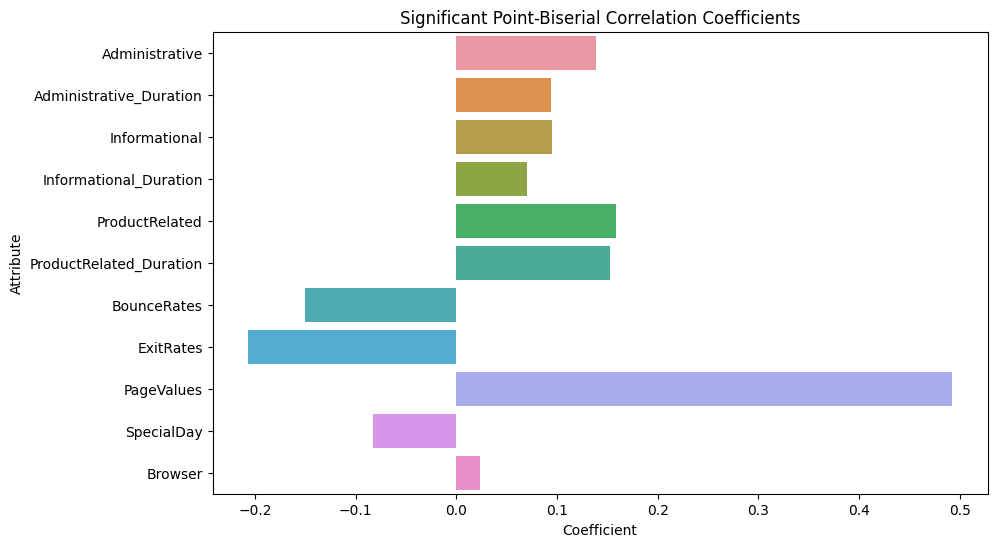

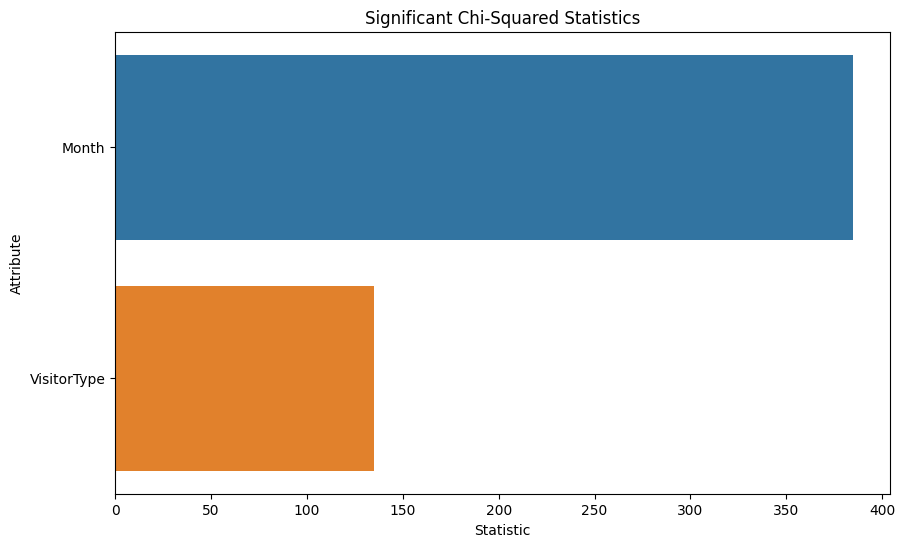

In [ ]:
from scipy.stats import pointbiserialr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate point-biserial correlation for numeric columns with respect to 'Revenue' and store the results
numeric_correlation_data = []
for col in numeric_columns:
    corr, p_value = pointbiserialr(data[col], data['Revenue'].astype(int))  # Converting boolean to int for calculation
    numeric_correlation_data.append([col, corr, p_value])

# Create a DataFrame to store numeric correlation results
numeric_correlation_results = pd.DataFrame(numeric_correlation_data, columns=['Attribute', 'Point-Biserial Coefficient', 'P-Value'])

# Calculate chi-squared correlation for categorical columns with respect to 'Revenue' and store the results
categorical_correlation_data = []
for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data['Revenue'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    categorical_correlation_data.append([col, chi2, p_value])

# Create a DataFrame to store categorical correlation results
categorical_correlation_results = pd.DataFrame(categorical_correlation_data, columns=['Attribute', 'Chi-Squared Statistic', 'P-Value'])

# Filter significant numeric correlations with a p-value less than or equal to 0.05
significant_numeric = numeric_correlation_results[numeric_correlation_results['P-Value'] <= 0.05]

# Plot significant numeric correlations as a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Point-Biserial Coefficient', y='Attribute', data=significant_numeric)
plt.title('Significant Point-Biserial Correlation Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Attribute')
plt.show()

# Filter significant categorical correlations with a p-value less than or equal to 0.05
significant_categorical = categorical_correlation_results[categorical_correlation_results['P-Value'] <= 0.05]

# Plot significant categorical correlations as a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi-Squared Statistic', y='Attribute', data=significant_categorical)
plt.title('Significant Chi-Squared Statistics')
plt.xlabel('Statistic')
plt.ylabel('Attribute')
plt.show()


The analysis of the results based on the tables and graphs obtained from the Point-Biserial Correlation for numeric attributes and the Chi-Squared Test for categorical attributes can provide valuable insights into the predictive power of each attribute in relation to the target variable `Revenue`.

### Analysis of Point-Biserial Correlation (Numeric Attributes)
- **High Correlation Coefficients**: Attributes with high positive or negative correlation coefficients have a stronger linear relationship with the target variable. For instance, if an attribute like `PageValues` has a high positive coefficient, it means that as the `PageValues` increase, the likelihood of a transaction (`Revenue`=True) also increases. Conversely, a high negative coefficient indicates an inverse relationship.
- **Significant P-Values (≤ 0.05)**: These indicate that the correlation is statistically significant. Attributes with significant p-values are more reliable for making predictions about `Revenue`.
- **Predictive Power**: Attributes with higher absolute values of the correlation coefficient and significant p-values are more influential in predicting `Revenue`. These should be considered important features in predictive modeling.

### Analysis of Chi-Squared Test (Categorical Attributes)
- **High Chi-Squared Statistics**: This indicates a stronger association between the categorical attribute and the target variable. For instance, a high chi-squared statistic for `Month` suggests that the month of the visit significantly affects the likelihood of a transaction.
- **Significant P-Values (≤ 0.05)**: Like in the numeric analysis, significant p-values here indicate that the relationship between the categorical attribute and `Revenue` is not due to random chance.
- **Predictive Power**: Categorical attributes with high chi-squared statistics and significant p-values can be considered strong predictors. They play a crucial role in differentiating between the classes of the target variable.

#### Feature Selection

- **Numeric Attributes**: We identify numeric attributes with high correlation coefficients and significant p-values (≤ 0.05) to select as predictive features.

- **Categorical Attributes**: For categorical attributes, we choose those with high Chi-Squared statistics and significant p-values for inclusion in our model.

#### Model Building

- We incorporate the selected numeric and encoded categorical features when building our predictive model.

#### Model Evaluation

- We evaluate our model's performance using appropriate metrics, gaining insights from feature importance and coefficients.

#### Model Optimization

- We fine-tune our model through hyperparameter tuning and experimentation to improve predictive accuracy.


# **Training and Evaluation of Prediction Algorithms**

## Logistic Regression

### Manual Implementation of Logistic Regression

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function for logistic regression
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X.dot(weights))
    epsilon = 1e-5  # To prevent log(0)
    cost = -1/m * (y.dot(np.log(h + epsilon)) + (1 - y).dot(np.log(1 - h + epsilon)))
    return cost

# Implement gradient descent for logistic regression optimization
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        weights = weights - (learning_rate/m) * X.T.dot(sigmoid(X.dot(weights)) - y)
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Encode target variable
label_encoder_target = LabelEncoder()
data['Revenue'] = label_encoder_target.fit_transform(data['Revenue'])

# Split the dataset into features and target variable
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameters
learning_rate = 0.01
iterations = 1000

# Scalers to use
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Dictionary to store accuracy for each scaler
accuracy_results = {}

for scaler_name, scaler in scalers.items():
    # Normalize the data using the scaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Add intercept term
    X_train_scaled = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
    X_test_scaled = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

    # Initialize weights
    weights = np.zeros(X_train_scaled.shape[1])

    # Perform gradient descent to learn the weights
    weights, cost_history = gradient_descent(X_train_scaled, y_train, weights, learning_rate, iterations)

    # Make predictions on the test set
    predictions = sigmoid(X_test_scaled.dot(weights)) >= 0.5

    # Calculate accuracy
    accuracy = np.mean(predictions == y_test)
    accuracy_results[scaler_name] = accuracy

# Print accuracy results for each scaler
for scaler_name, acc in accuracy_results.items():
    print(f'Accuracy with {scaler_name}: {acc}')


Accuracy with StandardScaler: 0.8740200054068668
Accuracy with MinMaxScaler: 0.8445525817788592
Accuracy with RobustScaler: 0.8851040821843742


### Implementation using scikit-learn library


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into features and target variable
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scalers to use
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Dictionary to store accuracy for each scaler
accuracy_results = {}

for scaler_name, scaler in scalers.items():
    # Normalize the data using the scaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize logistic regression model
    model = LogisticRegression(max_iter=1000)

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[scaler_name] = accuracy

# Print accuracy results for each scaler
for scaler_name, acc in accuracy_results.items():
    print(f'Accuracy with {scaler_name}: {acc}')


Accuracy with StandardScaler: 0.8805082454717491
Accuracy with MinMaxScaler: 0.8737496620708299
Accuracy with RobustScaler: 0.8805082454717491


1. **StandardScaler:**

   Both implementations achieved similar accuracy with the StandardScaler. The scikit-learn implementation slightly outperformed the manual implementation, but the difference is relatively small.

2. **MinMaxScaler:**

   The scikit-learn implementation with the MinMaxScaler achieved higher accuracy compared to the manual implementation. This suggests that the scikit-learn implementation may handle feature scaling and logistic regression optimization more effectively with this scaler.

3. **RobustScaler:**

   Both implementations achieved similar accuracy with the RobustScaler. The manual implementation had a slightly higher accuracy, but the difference is not significant.

Overall, the scikit-learn implementation provides a more convenient and efficient way to perform logistic regression, and in some cases, it resulted in slightly better accuracy, especially with the MinMaxScaler. However, both implementations yielded competitive results.

### Manual Implementation with Gradient Descent

#### Pros:
- Full control: Allows customization and fine-tuning at every step.
- Flexibility: Enables the implementation of custom logistic regression variants.

#### Cons:
- Complexity: Requires more lines of code and manual implementation of key components like gradient descent.
- Potential errors: Prone to bugs and may require more debugging effort.
- Efficiency: May not be as efficient as scikit-learn for large datasets.

### Scikit-Learn Implementation

#### Pros:
- Simplicity: Provides a high-level API for logistic regression, simplifying the implementation.
- Reliability: Well-tested and optimized for performance.

#### Cons:
- Limited customization: Less flexibility compared to manual implementation, especially for custom loss functions or algorithmic modifications.

### Which Implementation to Choose

- **Manual Implementation with Gradient Descent**:
  - Choose this approach when you want a deep understanding of logistic regression algorithms or need extensive customization.
  - Ideal for educational purposes and implementing non-standard logistic regression variants.

- **Scikit-Learn Implementation**:
  - Recommended for most practical machine learning projects, especially when you want to quickly apply logistic regression.
  - Provides a robust and efficient solution for standard logistic regression tasks.
  - Well-suited for projects with large datasets and leveraging scikit-learn's ecosystem for model evaluation.

Both approaches have their strengths and are valuable in different contexts.


## Decision Tree

### Train and Evaluate a Decision Tree Model using scikit-learn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Define scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply each scaler and evaluate the model
for scaler_name, scaler in scalers.items():
    # Scale the training and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the Decision Tree model
    decision_tree_model = DecisionTreeClassifier()
    decision_tree_model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = decision_tree_model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with {scaler_name}: {accuracy}')


Accuracy with StandardScaler: 0.8542849418761828
Accuracy with MinMaxScaler: 0.8532035685320357
Accuracy with RobustScaler: 0.8556366585563666


# **Comparative Evaluation of Results**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Preprocessing
label_encoders = {}
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

label_encoder_target = LabelEncoder()
data['Revenue'] = label_encoder_target.fit_transform(data['Revenue'])

# Define hyperparameters for logistic regression
learning_rate = 0.01
iterations = 1000

# Define scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Scaler', 'Depth', 'Split', 'Precision', 'Recall', 'F1', 'Accuracy'])

# Function to record results
def record_results(model, scaler, depth, split, y_true, y_pred):
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    results_df.loc[len(results_df)] = [model, scaler, depth, split, precision, recall, f1, accuracy]

# Loop over 10 random splits
for split in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data.drop('Revenue', axis=1), data['Revenue'], test_size=0.2)

    for scaler_name, scaler in scalers.items():
        # Scale the data
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Add intercept term for manual logistic regression
        X_train_scaled_intercept = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
        X_test_scaled_intercept = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

        # Logistic Regression - Manual Implementation
        weights = np.zeros(X_train_scaled_intercept.shape[1])
        weights, _ = gradient_descent(X_train_scaled_intercept, y_train, weights, learning_rate, iterations)
        predictions = sigmoid(X_test_scaled_intercept.dot(weights)) >= 0.5
        record_results('Logistic Regression (Manual)', scaler_name, None, split, y_test, predictions)

        # Logistic Regression - Scikit-Learn
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        record_results('Logistic Regression (Scikit-Learn)', scaler_name, None, split, y_test, y_pred)

        # Decision Tree - Scikit-Learn
        for depth in range(3, 7):
            decision_tree_model = DecisionTreeClassifier(max_depth=depth)
            decision_tree_model.fit(X_train_scaled, y_train)
            y_pred = decision_tree_model.predict(X_test_scaled)
            record_results('Decision Tree', scaler_name, depth, split, y_test, y_pred)

# Print or save results_df to analyze
print(results_df)

results_df.to_csv('model_evaluation_results.csv', index=False)



                                  Model          Scaler Depth  Split  \
0          Logistic Regression (Manual)  StandardScaler  None      0   
1    Logistic Regression (Scikit-Learn)  StandardScaler  None      0   
2                         Decision Tree  StandardScaler     3      0   
3                         Decision Tree  StandardScaler     4      0   
4                         Decision Tree  StandardScaler     5      0   
..                                  ...             ...   ...    ...   
175  Logistic Regression (Scikit-Learn)    RobustScaler  None      9   
176                       Decision Tree    RobustScaler     3      9   
177                       Decision Tree    RobustScaler     4      9   
178                       Decision Tree    RobustScaler     5      9   
179                       Decision Tree    RobustScaler     6      9   

     Precision    Recall        F1  Accuracy  
0     0.747126  0.329114  0.456942  0.874696  
1     0.738916  0.379747  0.501672  0.879

## Comparative Evaluation

### 1. Manual Implementation of Logistic Regression
- **F1 Score**: Achieves the highest F1 score among logistic regression models, particularly with RobustScaler, indicating effective balance between precision and recall.
- **Stability**: Shows higher variance across different splits, suggesting less consistency in performance.
- **Precision vs Recall**: Exhibits significant disparity between precision and recall, especially with MinMaxScaler, leading to an F1 score of 0 in some cases.

### 2. Scikit-Learn Implementation of Logistic Regression
- **F1 Score**: Presents a slightly lower F1 score compared to the manual implementation, yet maintains a good balance between precision and recall.
- **Stability**: More stable across different data splits, indicating better model consistency.
- **Accuracy**: Generally exhibits a higher accuracy compared to the manual implementation.
- **Ease of Use**: Benefits from the robustness and optimizations of scikit-learn, making it more user-friendly and scalable.

### 3. Decision Tree Classifier
- **F1 Score**: Delivers the best F1 score, especially at a depth of 3, showcasing an effective balance of precision and recall.
- **Model Complexity**: Simpler models (shallow trees) perform better, likely due to reduced overfitting.
- **Stability**: Demonstrates stable performance across different splits.
- **Impact of Scaling**: Performance is robust to scaling, unlike Logistic Regression models.

## Key Insights
- **Model Complexity**: The Decision Tree, with its simplicity, outperforms more complex models, underlining the importance of model selection based on dataset characteristics.
- **Scaling Sensitivity**: Logistic Regression models show significant sensitivity to the choice of scaling, while Decision Tree maintains consistent performance across scalers.
- **Manual vs Library Implementations**: While the manual Logistic Regression implementation scores well in F1, it lacks the stability and ease of use offered by scikit-learn's implementation.
- **Overall Performance**: The Decision Tree emerges as the most effective model for this dataset, balancing performance metrics with consistent reliability across different data splits.

## Conclusion
The choice of model should be guided by the specific requirements and characteristics of the dataset. In this analysis, the Decision Tree proves to be the most suitable model, offering robust performance and simplicity. For Logistic Regression, the scikit-learn implementation is recommended for its stability and ease of use, especially for large-scale or complex datasets.
